# Decorator Pattern in Python
ein Vortrag von Kevin Bücher

**Eine Dekoratorklasse:**

* Ist ein **Adapter** (siehe das Adapter Pattern)
* Sie implementiert die gleiche Schnittstelle wie das Objekt das sie umhüllt
* Sie delegiert Methodenaufrufe an das Objekt, das sie umhüllt

### Zur Erinnerung das Adapter Pattern:
![adapter.png](https://upload.wikimedia.org/wikipedia/commons/thumb/2/29/Objektadapter.svg/511px-Objektadapter.svg.png)
(Quelle: https://upload.wikimedia.org/wikipedia/commons/thumb/2/29/Objektadapter.svg/511px-Objektadapter.svg.png)
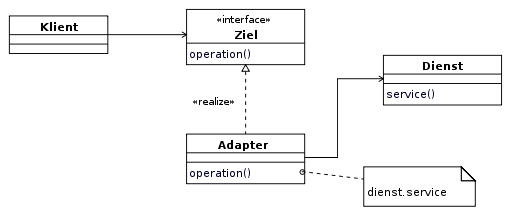

### Im Vergleich der Dekorator:
![decorator.png](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Dekorierer.svg/499px-Dekorierer.svg.png)
(Quelle: https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Dekorierer.svg/499px-Dekorierer.svg.png)

**Der Zweck der Dekoratorklasse ist es:**
* das Verhalten (das das umhüllte Objekt normalerweise implementieren würde, wenn seine Methoden aufgerufen werden) zu **ergänzen**, zu **entfernen** oder **anzupassen**.

**Mit einer Dekoratorklasse kann man:**

* Methodenaufrufe protokollieren, die normalerweise im Stillen ablaufen würden
* Zusätzliche Einstellungen oder Aufräumarbeiten rund um eine Methode durchführen
* Methodenargumente vorverarbeiten
* Rückgabewerte nachbearbeiten
* Aktionen verbieten, die das umhüllte Objekt normalerweise erlauben würde


**Erkennung von Dekoratoren:**
* Decorator können durch Erstellungsmethoden oder Konstruktoren erkannt werden, die Objekte der gleichen Klasse oder Schnittstelle wie die aktuelle Klasse akzeptieren.

## Codebeispiel:

In [1]:
class Component():
    """
    Die Basisschnittstelle von Component definiert Operationen, die durch Decorators geändert werden können.
    """

    def operation(self) -> str:
        pass

In [2]:
class ConcreteComponent(Component):
    """
    Konkrete Komponenten bieten Standardimplementierungen der Operationen.
    Es kann mehrere Variationen dieser Klassen geben.
    """

    def operation(self) -> str:
        return "ConcreteComponent"

In [3]:
class Decorator(Component):
    """
    Die Basisklasse Decorator hat die gleiche Schnittstelle wie die anderen Komponenten und dient in erster Linie dazu,
    die Wrapping-Schnittstelle für alle konkreten Decorators zu definieren.
    Die Standard-Implementierung des Wrapping-Codes kann ein Feld zum Speichern einer umhüllten Komponente und die Initiierung dessen sein.
    """

    _component: Component = None

    def __init__(self, component: Component) -> None:
        self._component = component

    @property
    def component(self) -> str:
        """
        Der Decorator delegiert die gesamte Arbeit an die umhüllte Komponente.
        """
        return self._component

    def operation(self) -> str:
        return self._component.operation()

In [4]:

class ConcreteDecoratorA(Decorator):
    """
    Konkrete Dekorateure rufen das umhüllte Objekt auf und ändern sein Ergebnis in irgendeiner Weise.
    """

    def operation(self) -> str:
        """
        Decorators können die übergeordnete Implementierung der Operation aufrufen, anstatt das umhüllte Objekt direkt aufzurufen.
        Dieser Ansatz vereinfacht die Erweiterung von Dekoratorklassen.
        """
        return f"ConcreteDecoratorA({self.component.operation()})"


In [5]:
class ConcreteDecoratorB(Decorator):
    """
    Decorators können ihr Verhalten entweder vor oder nach dem Aufruf eines umhüllten Objekts ausführen.
    """

    def operation(self) -> str:
        return f"ConcreteDecoratorB({self.component.operation()})"

In [6]:
def client_code(component: Component) -> None:
    """
    Der Client-Code arbeitet mit allen Objekten, die die Komponentenschnittstelle verwenden.
    Auf diese Weise kann er unabhängig von den konkreten Klassen der Komponenten bleiben, mit denen er arbeitet.
    """
    print(f"RESULT: {component.operation()}", end="")

In [7]:
# Auf diese Weise kann der Client-Code die simplen Components unterstützen...
simple = ConcreteComponent()
print("Client: Hier eine einfache Komponente:")
client_code(simple)
print("\n")

Client: Hier eine einfache Komponente:
RESULT: ConcreteComponent



In [8]:
# ...als auch die dekorierte Variante.
#
# Dekoratoren können nicht nur einfache Komponenten, sondern auch die anderen Dekoratoren umhüllen.
decorator1 = ConcreteDecoratorA(simple)
decorator2 = ConcreteDecoratorB(decorator1)
print("Client: Hier eine dekorierte Komponente:")
client_code(decorator2)

Client: Hier eine dekorierte Komponente:
RESULT: ConcreteDecoratorB(ConcreteDecoratorA(ConcreteComponent))

## Quellen:
* https://de.wikipedia.org/wiki/Decorator
* https://de.wikipedia.org/wiki/Adapter_(Entwurfsmuster)
* https://refactoring.guru/design-patterns/decorator/python/example
* https://python-patterns.guide/gang-of-four/decorator-pattern/